In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Cleaned_AirQuality.csv")

In [3]:
df = df.dropna()

In [4]:
target = "CO(GT)"
features = ["PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "NO2(GT)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]

In [5]:
df = df[features + [target]]


In [6]:
X = df[features]
y = df[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [10]:
results = {}

In [11]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R² Score": r2}

In [12]:
results_df = pd.DataFrame(results).T
print(results_df)

                       RMSE  R² Score
Linear Regression  0.240880  0.972126
Ridge Regression   0.241212  0.972049
Random Forest      0.253648  0.969093


In [13]:
# Visualize Residuals
best_model_name = max(results, key=lambda x: results[x]["R² Score"])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

<Axes: xlabel='CO(GT)', ylabel='Count'>

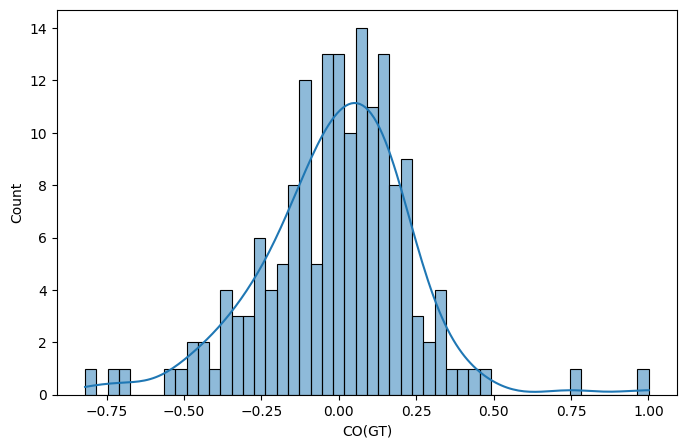

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)

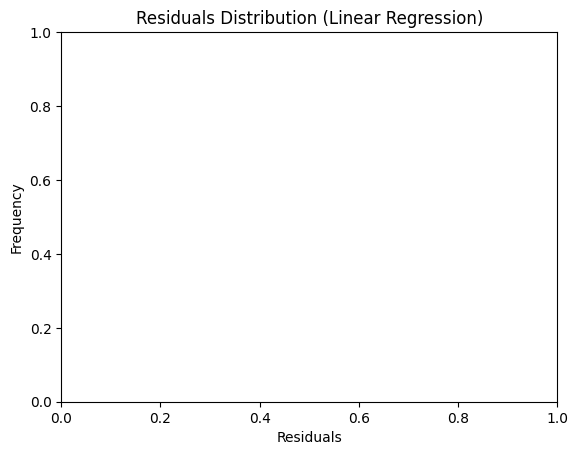

In [15]:
plt.title(f"Residuals Distribution ({best_model_name})")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [32]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the processed dataset
df = pd.read_csv("Cleaned_AirQuality.csv")

# Define target and features
target = "CO(GT)"
X = df.drop(columns=[target])
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "air_quality_model.pkl")

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Model R² Score: {r2:.2f}")


ValueError: could not convert string to float: '2004-04-05 16:00:00'